In [1]:
%matplotlib inline

from networkx.algorithms import connectivity as conn
from matplotlib import pyplot as plt
from tools import plot
import matplotlib.colors as mcolors
from tools import utils
import networkx as nx
import numpy as np
import scipy.io as sio
import time 
import os
import glob
import json

os.chdir("D:\Documenti\Lightning_Network_Logs_wider")
distance_list = [None] * len(glob.glob("*json"))
k_connectivity_list = [None] * len(glob.glob("*json"))
# Sets the picture size to a proper dimension.
plt.rcParams['figure.figsize'] = (10, 6)

# Create an array of snapshots of the network
graph_list = utils.load_graph_list("D:\Documenti\Lightning_Network_Logs_wider")
print(glob.glob('*.json'))

['log_00.json', 'log_01.json', 'log_02.json', 'log_03.json', 'log_04.json', 'log_05.json', 'log_06.json', 'log_07.json', 'log_08.json', 'log_09.json', 'log_10.json', 'log_11.json', 'log_12.json', 'log_13.json', 'log_14.json', 'log_15.json', 'log_16.json', 'log_17.json', 'log_18.json', 'log_19.json', 'log_20.json', 'log_21.json', 'log_22.json', 'log_23.json', 'log_24.json', 'log_25.json', 'log_26.json', 'log_27.json', 'log_28.json', 'log_29.json', 'log_30.json', 'log_31.json']


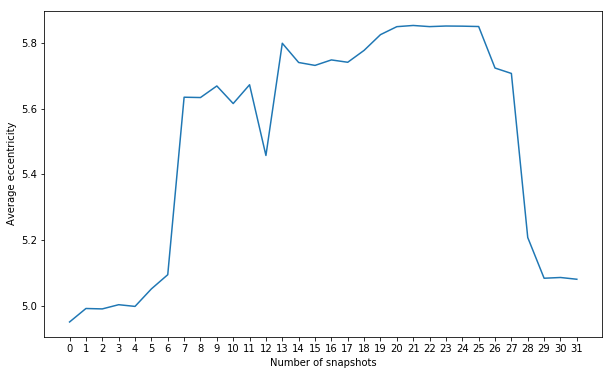

In [2]:
plt.rcParams['figure.figsize'] = (10, 6)
plot.plot_average_eccentricity(graph_list)

In [2]:
plt.rcParams['figure.figsize'] = (10, 6)
new_path = r'D:\Documenti\Lightning_Network_Logs_wider\matlab_data'
if not os.path.exists(new_path):
    os.makedirs(new_path)
os.chdir(new_path)
matlab_data = [[0] * graph.order() for graph in graph_list]
for i, graph in enumerate(graph_list):
    for node in graph.nodes:
        matlab_data[i][nx.degree(graph, node)] += 1
for i, data in enumerate(matlab_data):
    sio.savemat('degree_distrib_' + str(i), {'degree': data})


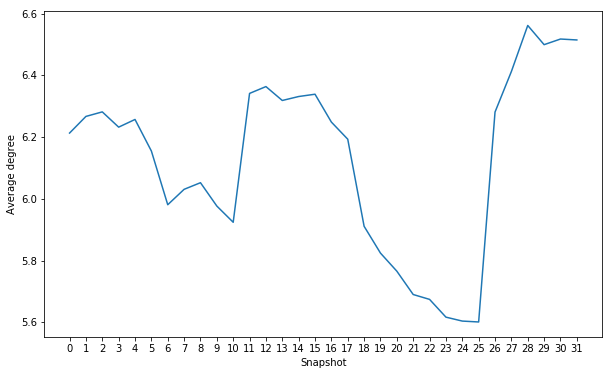

In [2]:
plt.rcParams['figure.figsize'] = (10, 6)
plot.plot_average_degree(graph_list)

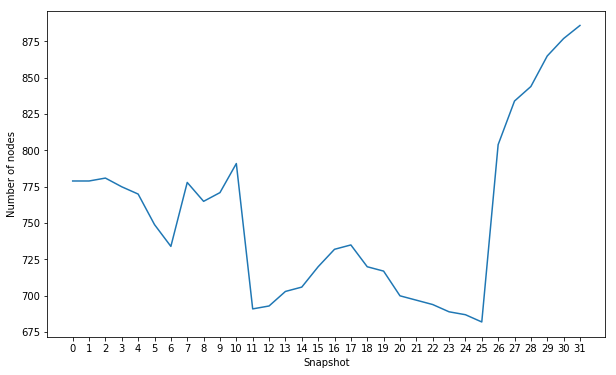

In [3]:
plt.rcParams['figure.figsize'] = (10, 6)
plot.plot_number_of_nodes(graph_list)

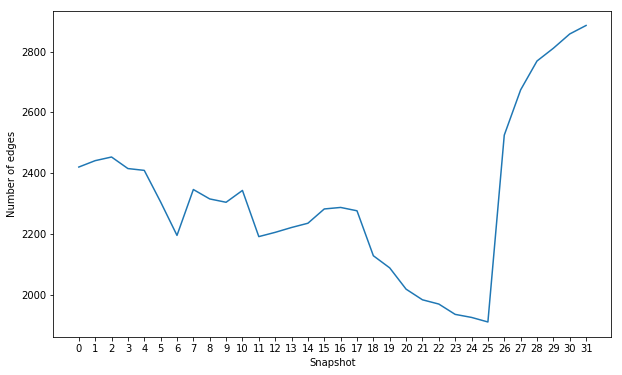

In [4]:
plt.rcParams['figure.figsize'] = (10, 6)
plot.plot_number_of_edges(graph_list)

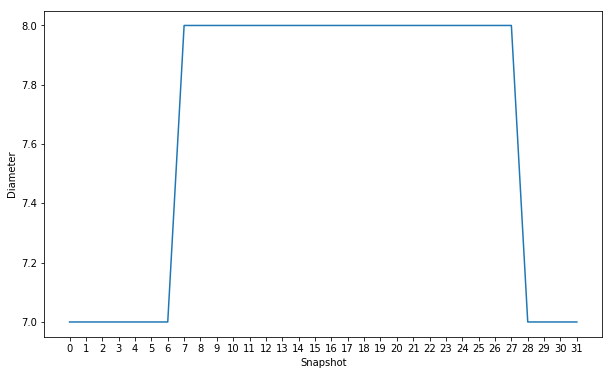

In [6]:
for i, graph in enumerate(graph_list):
    distance_list[i] = nx.diameter(graph)
plt.rcParams['figure.figsize'] = (10, 6)
plt.plot(distance_list)
plt.ylabel('Diameter')
plt.xlabel('Snapshot')
plt.xticks(np.arange(len(graph_list), step=1))
plt.savefig('distance.png', bbox_inches='tight')
plt.show()

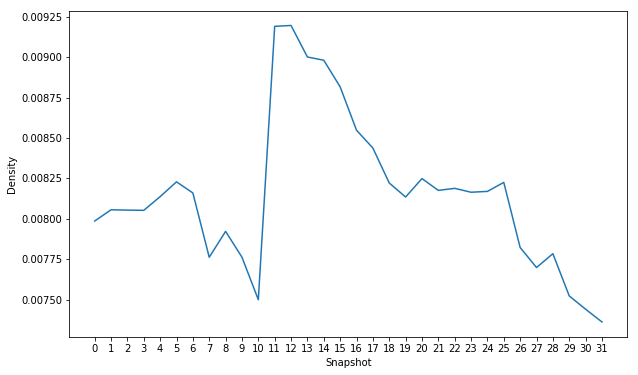

In [2]:
plt.rcParams['figure.figsize'] = (10, 6)
plot.plot_completeness(graph_list)

In [3]:
clustering_list = list()
for graph in graph_list:
    clustering_list.append(nx.average_clustering(graph))
print(clustering_list)

[0.24192982346975733, 0.24213527317708863, 0.2400172692148304, 0.2380710131351069, 0.23745732041800205, 0.2189052092943467, 0.2119610760158139, 0.21842711558736644, 0.22354809303431789, 0.21784008085577766, 0.21273690594546574, 0.22147601957794386, 0.21966730651095456, 0.22205005039303596, 0.2455853174283723, 0.2464471574493536, 0.24230067201902405, 0.24153525138704637, 0.19845119766859876, 0.19594042044498527, 0.1906310423092937, 0.18287837389711248, 0.18398241026737008, 0.1566538251320647, 0.1565995946634037, 0.15839209126701945, 0.16116300659724514, 0.16665774176601947, 0.177752991785464, 0.17044979468310018, 0.17447093781025685, 0.17304107611398808]


In [17]:
avg = sum(clustering_list) / len(clustering_list)
print(avg)

0.20591110810373525


In [3]:
full_day_graph_list = utils.load_graph_list(r'D:\Documenti\Lightning_Network_Logs\recent_logs\full_day0')

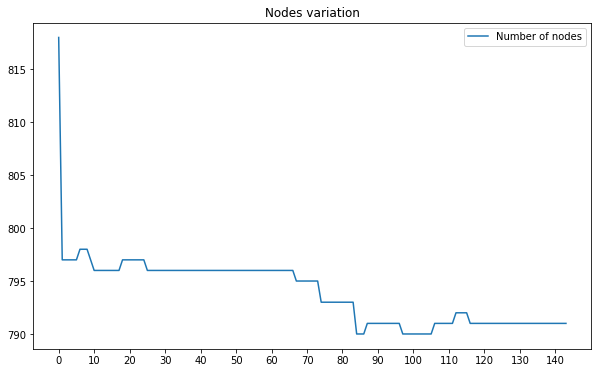

In [5]:
plt.rcParams['figure.figsize'] = (10, 6)
plot.plot_number_of_nodes(full_day_graph_list, step=10, filename='daily_number_of_nodes0.png')

In [4]:
labels = ['May 16th', 'May 21th', 'May 26th', 'June 2nd']
shape = ['solid','dashed', 'dashdot', 'dotted']
for i in range(4):
    # full_day_graph_list = utils.load_graph_list(r'D:\Documenti\Lightning_Network_Logs\recent_logs\full_day' + str(i))
    plt.rcParams['figure.figsize'] = (10, 6)
    if i < 3:
        plt.plot([7] * 144, label=labels[i])
    if i == 3:
        plt.plot([8] * 144, label=labels[i])
    os.chdir(r'D:\Documenti\Lightning_Network_Logs\recent_logs')
    plt.xlabel('Snapshot')
    plt.ylabel('Diameter')
    plt.ylim(6, 9)
    plt.xticks(np.arange(0, len(full_day_graph_list)+1, step=8))
    plt.savefig('daily_diameter' + str(i) + '.png', bbox_inches='tight')
    plt.close()

In [ ]:
max_order = 0
min_order = graph_list[0].number_of_edges()
first_order = graph_list[0].number_of_edges()
last_order = graph_list[len(graph_list) - 1].number_of_edges()
for graph in graph_list:
    if max_order < graph.number_of_edges():
        max_order = graph.number_of_edges()
    if min_order > graph.number_of_edges():
        min_order = graph.number_of_edges()
        
print('Max order: ' + str(max_order))
print('Min order: ' + str(min_order))
print('First order: ' + str(first_order))
print('Last order: ' + str(last_order))

variation = ((last_order - first_order) / first_order) * 100    
print(variation)

Max order: 2886
Min order: 1910
First order: 2420
Last order: 2886
19.25619834710744


In [35]:
max_order = 0
min_order = graph_list[0].number_of_nodes()
first_order = graph_list[0].number_of_nodes()
last_order = graph_list[len(graph_list) - 1].number_of_nodes()
for graph in graph_list:
    if max_order < graph.number_of_nodes():
        max_order = graph.number_of_nodes()
    if min_order > graph.number_of_nodes():
        min_order = graph.number_of_nodes()
        
print('Max order: ' + str(max_order))
print('Min order: ' + str(min_order))
print('First order: ' + str(first_order))
print('Last order: ' + str(last_order))

variation = ((last_order - first_order) / first_order) * 100    
print(variation)

Max order: 886
Min order: 682
First order: 779
Last order: 886
13.735558408215661


In [11]:
max_order = 0
avg_degree_list = [sum([x[1] for x in graph.degree()]) / float(graph.order()) for graph in graph_list]
min_order = avg_degree_list[0]
first_order = avg_degree_list[0]
last_order = avg_degree_list[len(avg_degree_list) - 1]
for avg_degree in avg_degree_list:
    if max_order < avg_degree:
        max_order = avg_degree
    if min_order > avg_degree:
        min_order = avg_degree
        
print('Max order: ' + str(max_order))
print('Min order: ' + str(min_order))
print('First order: ' + str(first_order))
print('Last order: ' + str(last_order))

variation = ((last_order - first_order) / first_order) * 100    
print(variation)

Max order: 6.561611374407583
Min order: 5.60117302052786
First order: 6.213093709884467
Last order: 6.514672686230249
4.8539260862265206


In [27]:
max_order = 0
avg_degree_list = [nx.diameter(graph) for graph in graph_list]
min_order = avg_degree_list[0]
first_order = avg_degree_list[0]
last_order = avg_degree_list[len(avg_degree_list) - 1]
for avg_degree in avg_degree_list:
    if max_order < avg_degree:
        max_order = avg_degree
    if min_order > avg_degree:
        min_order = avg_degree
        
print('Max order: ' + str(max_order))
print('Min order: ' + str(min_order))
print('First order: ' + str(first_order))
print('Last order: ' + str(last_order))

variation = ((last_order - first_order) / first_order) * 100    
print(variation)

Max order: 7
Min order: 7
First order: 7
Last order: 7
0.0


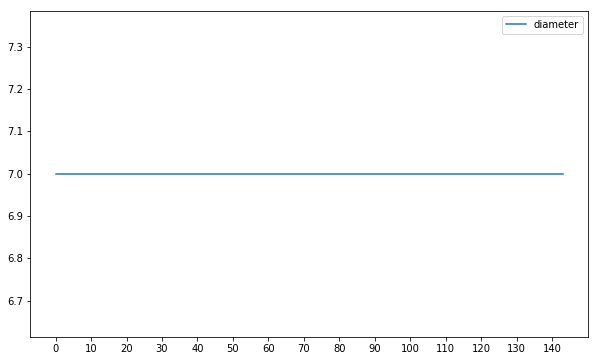

In [28]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.plot(avg_degree_list, label='diameter')
plt.xticks(np.arange(len(avg_degree_list), step=10))
plt.savefig('daily_diameter0', bbox_inches='tight')
plt.legend()
plt.show()


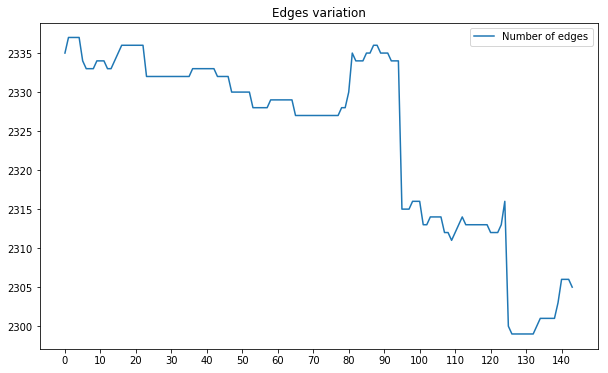

In [23]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.plot([graph.number_of_edges() for graph in full_day_graph_list])
plt.xlabel('Snapshot')
plt.ylabel('Number of Nodes')
plt.ylim(726, 820)
plt.xticks(np.arange(0, len(full_day_graph_list)+1, step=8))
plt.show()


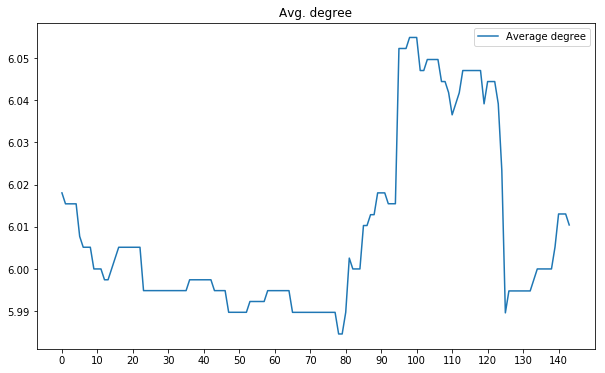

In [24]:
plt.rcParams['figure.figsize'] = (10, 6)
plot.plot_average_degree(full_day_graph_list, step=10, filename='daily_average_degree3.png')

Calculate the Betweenness Centrality measures for all the snapshot of the network. Returns the subgraph of those network with the most important nodes (BC value greater than 3 times the mean) along with the values returned by the betweenness centality.

Then plots the percentage of important nodes (and their respective edges) wrt the total number of nodes and edges.
**Average duration for 15 snapshots: 5 mins.**

In [3]:
betweenness_centrality_list = [nx.betweenness_centrality(graph) for graph in graph_list]

In [19]:
daily_graph_list = utils.load_graph_list(r'D:\Documenti\Lightning_Network_Logs\recent_logs\full_day3')

number_of_snapshot = len(daily_graph_list)

daily_betweenness_list = [nx.betweenness_centrality(graph) for graph in daily_graph_list]
utils.betweenness_centrality_intersection(daily_betweenness_list)

# Finds the most important nodes. The evaluation is performed by aggregating the values for all the nodes and selecting
# the most important ones.          
betweenness_centrality_sums = daily_betweenness_list[0].copy()
for i in range(1, len(graph_list)):
    for key in betweenness_centrality_sums.keys():
        betweenness_centrality_sums[key] = betweenness_centrality_sums[key] + daily_betweenness_list[i][key]

# Sort dictionary of the sums of the betweenness centralities and sort it on their value.
sorted_list = sorted(betweenness_centrality_sums.items(), key=lambda x: x[1], reverse=True)
# Then select the top five nodes of the sorted list.
top_five = [sorted_list[i][0] for i in range(5)]
# For each snapshot of betweenness centrality, select the top 5 nodes and their values.
top_five_list = dict()
for item in top_five:
    top_five_list[item] = [daily_betweenness_list[i][item] for i in range(len(daily_graph_list))]

plt.rcParams['figure.figsize'] = (10, 6)
plt.xticks(np.arange(len(daily_graph_list), step=8))
for key in top_five_list.keys():
    plt.plot(top_five_list[key], label=key[0: 5])
plt.legend()
plt.xlabel('Snapshot')
plt.ylabel('Betweenness centrality score')
plt.savefig('daily_betweenness_centrality3.png', bbox_inches='tight')
plt.show()


KeyboardInterrupt: 

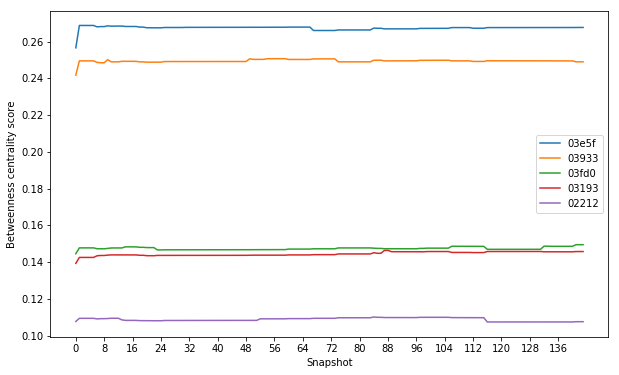

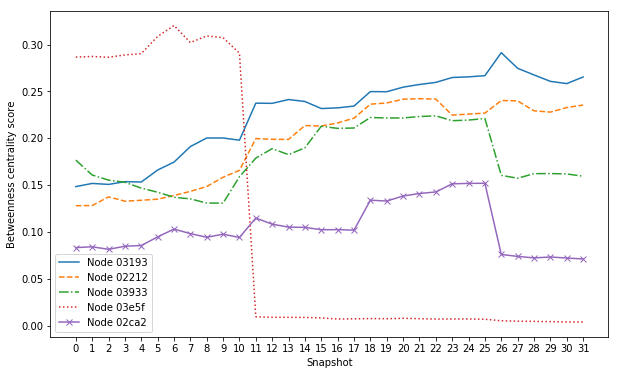

In [8]:
# Intersection of the nodes that persist for all the snapshots
shape = ['solid','dashed', 'dashdot', 'dotted']
utils.betweenness_centrality_intersection(betweenness_centrality_list)
number_of_snapshot = len(betweenness_centrality_list)

# Finds the most important nodes. The evaluation is performed by aggregating the values for all the nodes and selecting
# the most important ones.k_co
betweenness_centrality_sums = betweenness_centrality_list[0].copy()
for i in range(1, number_of_snapshot):
    for key in betweenness_centrality_sums.keys():
        betweenness_centrality_sums[key] = betweenness_centrality_sums[key] + betweenness_centrality_list[i][key]

# Sort dictionary of the sums of the betweenness centralities and sort it on their value.
sorted_list = sorted(betweenness_centrality_sums.items(), key=lambda x: x[1], reverse=True)
# Then select the top five nodes of the sorted list.
top_five = [sorted_list[i][0] for i in range(5)]
# For each snapshot of betweenness centrality, select the top 5 nodes and their values.
top_five_list = dict()
for item in top_five:
    top_five_list[item] = [betweenness_centrality_list[i][item] for i in range(number_of_snapshot)]

plt.rcParams['figure.figsize'] = (10, 6)
plt.xticks(range(number_of_snapshot))
for i, key in enumerate(top_five_list.keys()):
    if i == 4:
        plt.plot(top_five_list[key], label='Node ' + key[0: 5], marker='x')        
    else:
        plt.plot(top_five_list[key], label='Node ' + key[0: 5], linestyle=shape[i])
plt.legend()
plt.ylabel('Betweenness centrality score')
plt.xlabel('Snapshot')
os.chdir("D:\Documenti\Lightning_Network_Logs_wider")
plt.savefig('monthly_betweenness_centrality.png', bbox_inches='tight')
plt.show()

In [37]:
total_len  = 0
for graph in graph_list:
    total_neighbors = set(graph.neighbors(list(top_five_list.keys())[0]))
    for item in top_five_list.keys():
       total_neighbors = total_neighbors.union(set(graph.neighbors(item)))
    total_len += len(total_neighbors)
print(total_len/len(graph_list))

486.125


In [31]:
graph_copy1 = graph_list[10].copy()
for node in top_five_list.keys():
    print('Pub_key= ' + node + ', degree= ' + str(nx.degree(graph_copy1, node))) 
print('')
graph_copy2 = graph_list[11].copy()
for node in top_five_list.keys():
    print('Pub_key= ' + node + ', degree= ' + str(nx.degree(graph_copy2, node))) 
new_nodes = set(graph_copy1.nodes) - set(graph_copy2.nodes)


print(len(new_nodes))
new_neighbors = set(graph_copy1.neighbors('03e5f9d1935c67a029bf0a26af5f63109f4f4c45993a8f45177a8f2f39bcb46144')) - \
set(graph_copy2.neighbors('03e5f9d1935c67a029bf0a26af5f63109f4f4c45993a8f45177a8f2f39bcb46144'))
print('new neigbohrs ' + str(len(new_neighbors)))
print(top_five_list['03e5f9d1935c67a029bf0a26af5f63109f4f4c45993a8f45177a8f2f39bcb46144'][10])

single_channel_count = 0
for node in new_neighbors:
    if nx.degree(graph_copy1, node) == 1:
        single_channel_count += 1
print(single_channel_count)
print(len(graph_copy1.nodes))

Pub_key= 03193d512b010997885b232ecd6b300917e5288de8785d6d9f619a8952728c78e8, degree= 168
Pub_key= 02212d3ec887188b284dbb7b2e6eb40629a6e14fb049673f22d2a0aa05f902090e, degree= 150
Pub_key= 03933884aaf1d6b108397e5efe5c86bcf2d8ca8d2f700eda99db9214fc2712b134, degree= 115
Pub_key= 03e5f9d1935c67a029bf0a26af5f63109f4f4c45993a8f45177a8f2f39bcb46144, degree= 196
Pub_key= 02ca22bc12c1c21901c284034d3caad5432f495d440e05a3fc96bfa54e09138d3d, degree= 142

Pub_key= 03193d512b010997885b232ecd6b300917e5288de8785d6d9f619a8952728c78e8, degree= 171
Pub_key= 02212d3ec887188b284dbb7b2e6eb40629a6e14fb049673f22d2a0aa05f902090e, degree= 149
Pub_key= 03933884aaf1d6b108397e5efe5c86bcf2d8ca8d2f700eda99db9214fc2712b134, degree= 111
Pub_key= 03e5f9d1935c67a029bf0a26af5f63109f4f4c45993a8f45177a8f2f39bcb46144, degree= 37
Pub_key= 02ca22bc12c1c21901c284034d3caad5432f495d440e05a3fc96bfa54e09138d3d, degree= 147
108
new neigbohrs 159
0.2908584852344639
98
791


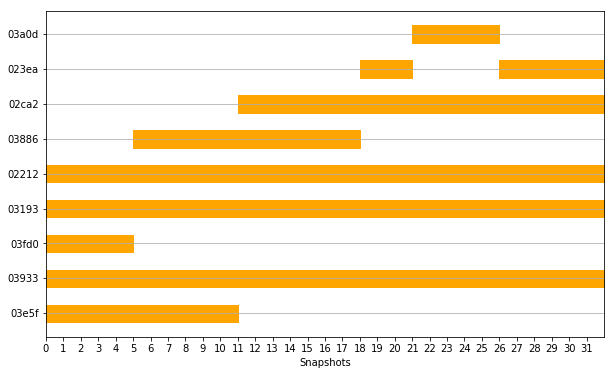

In [38]:
import collections as ct

gap_dictionary = ct.defaultdict(list)
# Builds a presence list among the top 15 nodes over the period observed
presence_dict = utils.build_presence_dictionary(betweenness_centrality_list, 5)
plt.rcParams['figure.figsize'] = (10, 6)        
for item in presence_dict:
    start = predecessor = presence_dict[item][0]
    for current in presence_dict[item]:
        if current - predecessor > 1:
            gap = predecessor - start + 1
            gap_dictionary[item].append((start, gap))
            start = current
        predecessor = current
    gap = predecessor - start + 1
    gap_dictionary[item].append((start, gap))

ax = plt.subplot()
ax.set_xlim(0, len(graph_list))
ax.set_xticks(np.arange(len(graph_list)))
ax.set_xlabel('Snapshots')
ax.set_yticks(range(len(gap_dictionary.keys())))
ax.set_yticklabels([item[0: 5] for item in gap_dictionary.keys()])
plt.grid(True, axis='y')
for i, key in enumerate(gap_dictionary.keys()):
    ax.broken_barh(gap_dictionary[key], (i-0.25, 0.5), color='orange')
os.chdir("D:\Documenti\Lightning_Network_Logs_wider")
plt.savefig('gantt_chart.png', bbox_inches='tight')
plt.show()

In [5]:
k_edges_connectivity = nx.edge_connectivity(graph_list[0])
print(k_edges_connectivity)

1


Calculates k-vertex connectivity, this task is CPU intensive. Average of 5 mins per snapshot.

In [14]:
new_path = r'D:\Documenti\Lightning_Network_Logs_wider\k_conn'
if not os.path.exists(new_path):
    os.makedirs(new_path)
os.chdir(new_path)
start = time.time()
for i, graph in enumerate(graph_list): 
    k_connectivity_list[i] = conn.k_components(graph)
    end = time.time()
    for key in k_connectivity_list[i].keys():
        for j in range(len(k_connectivity_list[i][key])):
            k_connectivity_list[i][key][j] = list(k_connectivity_list[i][key][j])
    with open('k_conn_' + str(i).zfill(2) + '.json', 'w') as f:
        json.dump(k_connectivity_list[i], f, indent=4)
    elapsed = end - start
    print('Task number ' + str(i) + ' finished in ' + str(elapsed) + ' seconds.')

Task number 0 finished in 381.0204300880432 seconds.


Task number 1 finished in 807.3275647163391 seconds.


Task number 2 finished in 1319.2334427833557 seconds.


Task number 3 finished in 1708.1418566703796 seconds.


Task number 4 finished in 2083.8094334602356 seconds.


Task number 5 finished in 2341.5854671001434 seconds.


Task number 6 finished in 2555.2034237384796 seconds.


Task number 7 finished in 2832.3722171783447 seconds.


Task number 8 finished in 3048.185341358185 seconds.


Task number 9 finished in 3211.021448612213 seconds.


Task number 10 finished in 3399.1459863185883 seconds.


Task number 11 finished in 3535.86466383934 seconds.


Task number 12 finished in 3689.001895427704 seconds.


Task number 13 finished in 3860.2313554286957 seconds.


Task number 14 finished in 4006.390000104904 seconds.


Task number 15 finished in 4160.714950799942 seconds.


Task number 16 finished in 4320.3151869773865 seconds.


Task number 17 finished in 4471.316849946976 seconds.


Task number 18 finished in 4582.431483745575 seconds.


Task number 19 finished in 4692.248949050903 seconds.


Task number 20 finished in 4785.277796506882 seconds.


Task number 21 finished in 4874.167466878891 seconds.


Task number 22 finished in 4966.8623151779175 seconds.


Task number 23 finished in 5057.045295476913 seconds.


Task number 24 finished in 5131.303803920746 seconds.


Task number 25 finished in 5204.278877496719 seconds.


Task number 26 finished in 5667.711017370224 seconds.


Task number 27 finished in 6171.428788423538 seconds.


Task number 28 finished in 6618.877773523331 seconds.


Task number 29 finished in 7051.0760815143585 seconds.


Task number 30 finished in 7545.002841234207 seconds.


Task number 31 finished in 8054.227787494659 seconds.


In [3]:
# If the k-vertex connectivity has already been evaluated then run this cell
k_conn_path = r'D:\Documenti\Lightning_Network_Logs_wider\k_conn'
print(glob.glob('*.json'))
k_connectivity_list = utils.read_k_conn_from_files(k_conn_path)

['log_00.json', 'log_01.json', 'log_02.json', 'log_03.json', 'log_04.json', 'log_05.json', 'log_06.json', 'log_07.json', 'log_08.json', 'log_09.json', 'log_10.json', 'log_11.json', 'log_12.json', 'log_13.json', 'log_14.json', 'log_15.json', 'log_16.json', 'log_17.json', 'log_18.json', 'log_19.json', 'log_20.json', 'log_21.json', 'log_22.json', 'log_23.json', 'log_24.json', 'log_25.json', 'log_26.json', 'log_27.json', 'log_28.json', 'log_29.json', 'log_30.json', 'log_31.json']


Calculates and plots the **average** vertex size for *k*-vertex components of the graph.

defaultdict(<class 'int'>, {'14': 18, '13': 30, '12': 32, '11': 32, '10': 32, '9': 32, '8': 32, '7': 32, '6': 32, '5': 32, '4': 32, '3': 32, '2': 32, '1': 32, '15': 2})


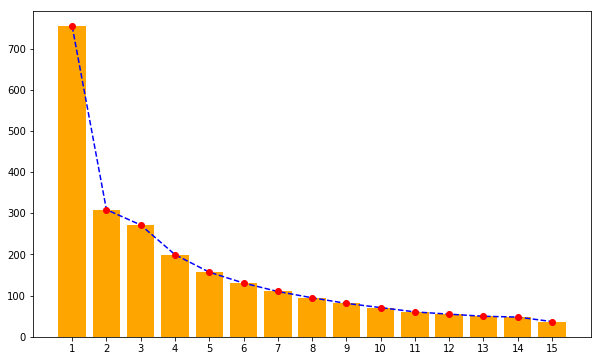

In [13]:
import collections as ct

# Calculates the average components size of the aggregated k_connectivity score, i.e. for each 

# If the k-vertex connectivity has already been evaluated then run this cell
k_conn_path = r'D:\Documenti\Lightning_Network_Logs_wider\k_conn'
k_connectivity_list = utils.read_k_conn_from_files(k_conn_path)

k_vertex_size = dict()
plt.rcParams['figure.figsize'] = (10, 6)

# To calculate the average size of each component we need a counter that tells us
# how many time such a component exists.
# k_vertex_size[key] accumulates the size of each k_component.
# key_counter[key] accumulates how many times we have such a component.
key_counter = ct.defaultdict(int)
max_size = max([len(k_connectivity_list[i].keys()) for i in range(len(k_connectivity_list))])

for i in range(1, max_size + 1):
    k_vertex_size[str(i)] = 0

# This cycle assumes same length for each connectivity list (error)
for i in range(len(k_connectivity_list)):
    for key in k_connectivity_list[i].keys():
        if i == 0:
            k_vertex_size[key] = len(k_connectivity_list[i][key][0])
        else:
            k_vertex_size[key] += len(k_connectivity_list[i][key][0])
        key_counter[key] += 1

print(key_counter)
# Inverted sorted list of number of nodes averages.
k_vertex_size = sorted([k_vertex_size[key] / key_counter[key] for key in k_vertex_size.keys()], reverse=True)
plt.xticks(np.arange(max_size),
           sorted(np.arange(1, max_size + 1)))
for i, elem in enumerate(k_vertex_size):
    plt.bar(i, k_vertex_size[i], 0.8, align='center', color='orange')
    
# Plot a blue dashed curve over the points of the size.
plt.plot(k_vertex_size, 'b--')

# Plot red dots over the spot identified by the list
plt.plot(k_vertex_size, 'or',)
plt.savefig('k_connectivity_average_size.png', bbox_inches='tight')
plt.show()

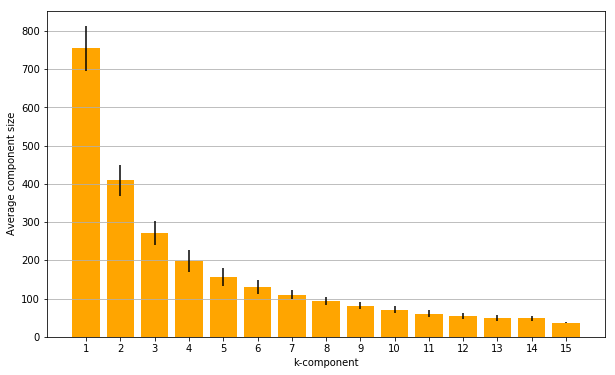

In [61]:
import collections as ct

# Calculates the average components size of the aggregated k_connectivity score, i.e. for each 

# If the k-vertex connectivity has already been evaluated then run this cell
k_conn_path = r'D:\Documenti\Lightning_Network_Logs_wider\k_conn'
k_connectivity_list = utils.read_k_conn_from_files(k_conn_path)

k_vertex_size = dict()
plt.rcParams['figure.figsize'] = (10, 6)
ax = plt.subplot()

# To calculate the average size of each component we need a counter that tells us
# how many time such a component exists.
# k_vertex_size[key] accumulates the size of each k_component.
# key_counter[key] accumulates how many times we have such a component.
key_counter = ct.defaultdict(int)
max_size = max([len(k_connectivity_list[i].keys()) for i in range(len(k_connectivity_list))])

for i in range(1, max_size + 1):
    k_vertex_size[str(i)] = list()

for i in range(len(k_connectivity_list)):
    for key in k_connectivity_list[i].keys():
        sublist_elements = 0
        for sublist in k_connectivity_list[i][key]:
            sublist_elements += len(sublist)
        k_vertex_size[key].append(sublist_elements)
        key_counter[key] += 1

mean_k_vertex_array = sorted([np.mean(k_vertex_size[key]) for key in k_vertex_size.keys()], reverse=True)
std_dev_k_vertex_array = sorted([np.std(k_vertex_size[key]) for key in k_vertex_size.keys()], reverse=True)

for i in range(len(mean_k_vertex_array)):
    ax.bar(i + 1, mean_k_vertex_array[i], 0.8, yerr=std_dev_k_vertex_array[i], align='center', color='orange')

ax.set_xticks(np.arange(1, max_size+1, step=1))
ax.grid(True, axis='y')
plt.ylabel('Average component size')
plt.xlabel('k-component')
plt.savefig('k_connectivity_average_size.png', bbox_inches='tight')
plt.show()

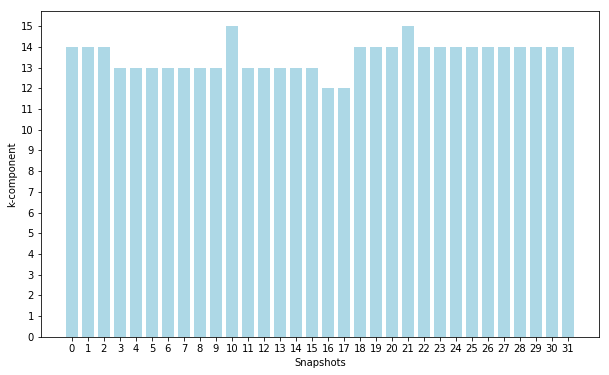

In [46]:
max_components = [max([int(key) for key in k_components]) for k_components in k_connectivity_list]

plt.rcParams['figure.figsize'] = (10, 6)

ax = plt.subplot()
ax.set_xticks(np.arange(len(max_components)))
ax.set_yticks(np.arange(max(max_components) + 1))

for i, elem in enumerate(max_components):
    ax.bar(i, elem, 0.7, align='center', color='lightblue')
    
plt.xlabel('Snapshots')
plt.ylabel('k-component')
plt.savefig('k_connectivity_max_size.png', bbox_inches='tight')
plt.show()

In [ ]:
component = k_connectivity_list[7]
for i, component in enumerate(k_connectivity_list):
    for elem in component.keys():
        if len(component[elem]) != 1:
            for lists in component[elem]:
                print('Snapshot ' + str(i).zfill(2) + ',  ' + elem + ', ' + str(len(lists)))
                
print(len(k_connectivity_list[26]['2'][0]))

Snapshot 07,  3, 279
Snapshot 07,  3, 4
Snapshot 08,  3, 276
Snapshot 08,  3, 4
Snapshot 09,  3, 275
Snapshot 09,  3, 4
Snapshot 11,  2, 4
Snapshot 11,  2, 396
Snapshot 26,  2, 3
Snapshot 26,  2, 438
Snapshot 27,  2, 3
Snapshot 27,  2, 3
Snapshot 27,  2, 457
Snapshot 28,  2, 3
Snapshot 28,  2, 3
Snapshot 28,  2, 472
Snapshot 29,  2, 3
Snapshot 29,  2, 3
Snapshot 29,  2, 479
Snapshot 30,  2, 3
Snapshot 30,  2, 3
Snapshot 30,  2, 483
Snapshot 31,  2, 3
Snapshot 31,  2, 3
Snapshot 31,  2, 486
3


[43, 36, 38, 45, 45, 42, 35, 44, 44, 43, 43, 38, 46, 46, 46, 48, 48, 48, 46, 45, 43, 43, 43, 43, 47, 47, 57, 58, 58, 59, 59, 59]


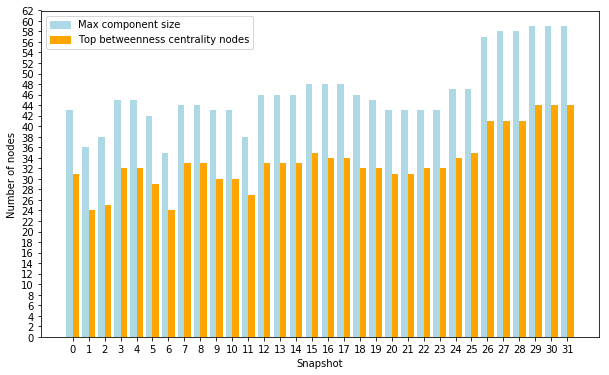

In [4]:
import matplotlib.patches as mpatches

k_conn_path = r'D:\Documenti\Lightning_Network_Logs_wider\k_conn'
k_connectivity_list = utils.read_k_conn_from_files(k_conn_path)
# Increase the size of the plot
plt.rcParams['figure.figsize'] = (10, 6)

number_of_snapshot = len(k_connectivity_list)

# Select the max values of the keys for each snapshot, convert it to string.
max_keys = list()
for x in range(number_of_snapshot):
    max_keys.append(str(max([int(value) for value in k_connectivity_list[x].keys()])))

plt.yticks(np.arange(0, 100, 2))
sorted_betweenness_centrality_list = [None] * number_of_snapshot
for i, betweenness_centrality in enumerate(betweenness_centrality_list):
    sorted_betweenness_centrality_list[i] = sorted(betweenness_centrality_list[i].items(),
                                                   reverse=True, key=lambda kv: kv[1])
    
print([len(k_connectivity_list[i][max_keys[i]][0]) for i in range(number_of_snapshot)])

for i in range(number_of_snapshot):
    best_betweenness = [sorted_betweenness_centrality_list[i][j][0] for j in range(len(k_connectivity_list[i][max_keys[i]][0]))]
    intersect = set(k_connectivity_list[i][max_keys[i]][0]) & set(best_betweenness)
    plt.bar(i-0.2, len(k_connectivity_list[i][max_keys[i]][0]), 0.4, align='center', color='lightblue')
    plt.bar(i+0.2, len(intersect), 0.4, align='center', color='orange')
    plt.xticks(np.arange(number_of_snapshot))

lightblue_patch = mpatches.Patch(color='lightblue', label='Max component size')
orange_patch = mpatches.Patch(color='orange', label='Top betweenness centrality nodes')
plt.legend(handles=[lightblue_patch, orange_patch])
plt.ylabel('Number of nodes')
plt.xlabel('Snapshot')
plt.savefig('k_connectivity_beetwenness.png', bbox_inches='tight')
plt.show()

In [9]:
percentage_list = list()
for i in range(number_of_snapshot):
    best_betweenness = [sorted_betweenness_centrality_list[i][j][0] for j in range(len(k_connectivity_list[i][max_keys[i]][0]))]
    intersect = set(k_connectivity_list[i][max_keys[i]][0]) & set(best_betweenness)
    percentage_list.append((len(intersect) / len(k_connectivity_list[i][max_keys[i]][0])) * 100)
print(np.mean(percentage_list))
print(np.std(percentage_list))

72.34358498925464
2.762940731846483


In [ ]:
start = time.time()
cutsets = [None] * len(graph_list)
for i, graph in enumerate(graph_list): 
    cutsets[i] = nx.all_node_cuts(graph)
    end = time.time()
    elapsed = end - start
    print('Task number ' + str(i) + ' finished in ' + str(elapsed) + ' seconds.')

In [60]:
# Degree distribution
os.chdir(r'D:\Documenti\Lightning_Network_Logs_wider\matlab_data')
for i, graph in enumerate(graph_list):
    p_k = [0] * graph.order()
    for k in range(graph.order()):
        node_count = 0
        for node in graph:
            if nx.degree(graph, node) == k:
                node_count += 1.0
        p_k[k] = node_count / (graph.number_of_nodes())
    print(sum(p_k))
    sio.savemat('degree_distrib_' + str(i), {'distrib': p_k})


0.9999999999999993


0.9999999999999994


1.0000000000000002


1.0000000000000007


0.9999999999999983


1.0000000000000007


0.9999999999999997


0.9999999999999991


0.9999999999999997


0.9999999999999997


1.0000000000000013


1.0000000000000009


1.0000000000000007


0.9999999999999989


0.9999999999999999


0.9999999999999996


0.9999999999999984


0.9999999999999992


0.9999999999999998


0.9999999999999987


1.0000000000000009


1.0000000000000009


1.0000000000000013


0.9999999999999998


1.0000000000000007


0.9999999999999998


1.0000000000000002


0.9999999999999994


1.000000000000001


1.0000000000000022


0.9999999999999987


0.9999999999999991


In [51]:
print(sum(p_k))

1.0000000000000007


In [91]:
s = nx.utils.powerlaw_sequence(886, 2.0453) #100 nodes, power-law exponent 2.5
G = nx.expected_degree_graph(s, selfloops=False)
G = max(nx.connected_component_subgraphs(G), key=len)



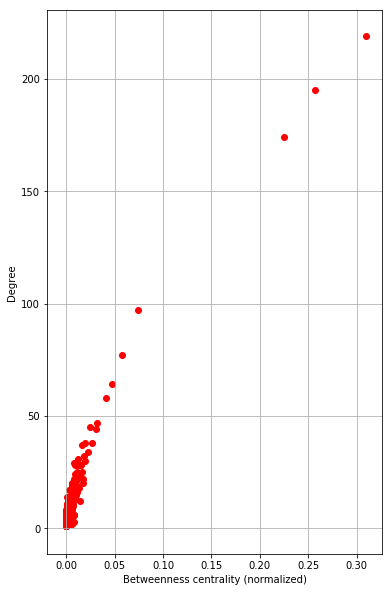

In [93]:
chung_lu_betweenness = nx.betweenness_centrality(G)
chung_lu_betweenness = [(G.degree(item[0]), item[1]) for item in chung_lu_betweenness.items()]
for item in chung_lu_betweenness:
    plt.scatter(item[1], item[0], c='r')

plt.grid(True)
plt.rcParams['figure.figsize'] = (6, 10)
plt.ylabel('Degree')
plt.xlabel('Betweenness centrality (normalized)')
plt.savefig('scatter_plot_betweenness_centrality_chung_lu.png', bbox_inches='tight')
plt.show()

In [83]:
print(G.order())
print(G.number_of_edges())
print(nx.average_clustering(G))
print(nx.diameter(G))

879
1103
0.2059223749013185


2


In [45]:
print(nx.average_shortest_path_length(connected_G))

3.1096005824838775


In [ ]:
avg_shortest = 0
for graph in graph_list:
    avg_shortest += nx.average_shortest_path_length(graph)
print(avg_shortest/len(graph_list))

3.0981849699122885


In [12]:
pos = nx.spring_layout(max_G)
nx.draw_networkx(max_G, pos, k=0.9)
plt.show()

NameError: name 'max_G' is not defined

In [20]:
plt.rcParams['figure.figsize'] = (10, 6)
new_path = r'D:\Documenti\Lightning_Network_Logs_wider\full_graph\full_graph.json'
os.chdir(r'D:\Documenti\Lightning_Network_Logs_wider\full_graph')
with open(new_path, encoding='utf-8') as f:
    json_graph = json.load(f)
    graph = utils.parse_graph_from_json(json_graph)

matlab_data = [0] * graph.order()
for node in graph.nodes:
    matlab_data[nx.degree(graph, node)] += 1

sio.savemat('degree_distrib_full', {'degree': matlab_data})


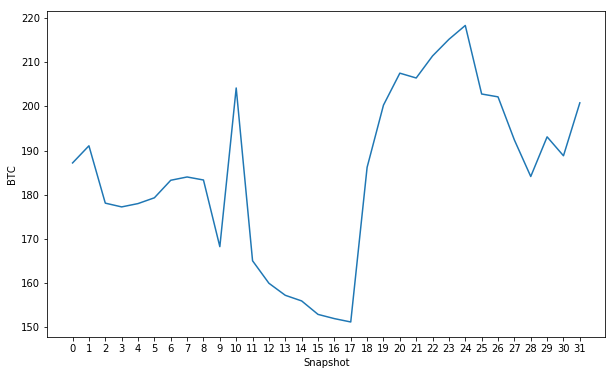

In [2]:
plt.rcParams['figure.figsize'] = (10, 6)
plot.plot_overall_capacity(graph_list)

In [ ]:
core_graph = utils.core_component(graph_list)
print(len(core_graph))

503


In [11]:
default_timelock_count = 0
for item in nx.get_edge_attributes(graph_list[0], 'node1_timelock_delta').values():
    if item == 144:
        default_timelock_count += 1
for item in nx.get_edge_attributes(graph_list[0], 'node2_timelock_delta').values():
    if item == 144:
        default_timelock_count += 1
print(default_timelock_count)
print(graph_list[0].number_of_edges())
percentage = default_timelock_count / (graph_list[0].number_of_edges()*2)
print(percentage)

4182
2304
0.9075520833333334


In [4]:
G = nx.barabasi_albert_graph(886, 3)
print(G.order())
print(G.number_of_edges())
print(nx.average_clustering(G))
print(nx.diameter(G))
print(nx.average_shortest_path_length(G))
print(nx.radius(G))

886
2649
0.03639857368647377


6


3.405588501613294


3


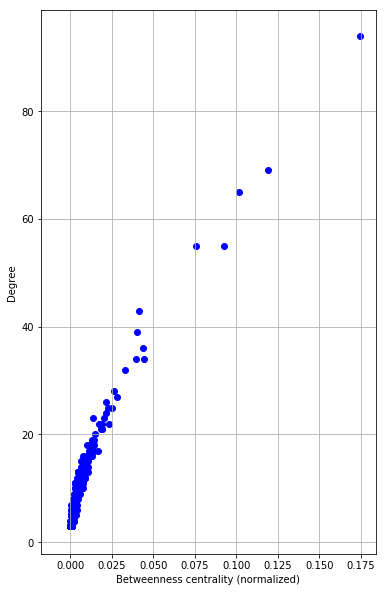

In [90]:
barabasi_albert_betweenness = nx.betweenness_centrality(G)
barabasi_albert_betweenness = [(G.degree(item[0]), item[1]) for item in barabasi_albert_betweenness.items()]
for item in barabasi_albert_betweenness:
    plt.scatter(item[1], item[0], c='b')
    
plt.grid(True)
plt.rcParams['figure.figsize'] = (6, 10)
plt.ylabel('Degree')
plt.xlabel('Betweenness centrality (normalized)')
plt.savefig('scatter_plot_betweenness_centrality_barabasi.png', bbox_inches='tight')
plt.show()

In [15]:
order_array = list()
edges_array = list()
avg_clustering_array = list()
diameter_array = list()
avg_eccentricity_array = list()
radius_array = list()
avg_shortest_path_array = list()

n = 100
for i in range(n):
    BA = nx.barabasi_albert_graph(886, 3)
    order_array.append(BA.order())
    edges_array.append(BA.number_of_edges())
    avg_clustering_array.append(nx.average_clustering(BA))
    eccentricity = nx.eccentricity(BA)
    diameter_array.append(max(list(eccentricity.values())))
    avg_eccentricity_array.append(np.mean(list(eccentricity.values())))
    radius_array.append(min(list(eccentricity.values())))
    avg_shortest_path_array.append(nx.average_shortest_path_length(G))
    

print(np.mean(order_array))
print(np.mean(edges_array))
print(np.mean(avg_clustering_array))
print(np.mean(diameter_array))
print(np.mean(avg_eccentricity_array))
print(np.mean(radius_array))
print(np.mean(avg_shortest_path_array))

886.0
2649.0
0.034195664823098146
6.0
4.906501128668172
3.87
3.4871918480825395


In [ ]:
order_array = list()
edges_array = list()
avg_clustering_array = list()
diameter_array = list()
avg_eccentricity_array = list()
radius_array = list()
avg_shortest_path_array = list()

n = 100
for i in range(n):
    s = nx.utils.powerlaw_sequence(886, 2.0453)
    G = nx.expected_degree_graph(s, selfloops=False)
    utils.clean_isolated_nodes(G)
    G = max(nx.connected_component_subgraphs(G), key=len)
    order_array.append(G.order())
    edges_array.append(G.number_of_edges())
    avg_clustering_array.append(nx.average_clustering(G))
    eccentricity = nx.eccentricity(G)
    diameter_array.append(max(list(eccentricity.values())))
    avg_eccentricity_array.append(np.mean(list(eccentricity.values())))
    radius_array.append(min(list(eccentricity.values())))
    avg_shortest_path_array.append(nx.average_shortest_path_length(G))


print(np.mean(order_array))
print(np.mean(edges_array))
print(np.mean(avg_clustering_array))
print(np.mean(diameter_array))
print(np.mean(avg_eccentricity_array))
print(np.mean(avg_shortest_path_array)) 
print(np.mean(radius_array))

763.57
2205.94
0.3247772017436253
6.54
4.778335567920501
2.71907908019532
3.48


In [39]:
radius_array = list()
avg_eccentricity_array = list()
for graph in graph_list:
    eccentricity = nx.eccentricity(graph)
    avg_eccentricity_array.append(np.mean(list(eccentricity.values())))
    radius_array.append(min(list(eccentricity.values())))
print(np.mean(radius_array))
print(np.mean(avg_eccentricity_array))

4.0
5.503772057493371


In [2]:
graph_edges_1 = set(graph_list[0].edges)
edges_variation = list()
edges_stable = set(graph_list[0].edges)
edges_changes = dict()

for i in range(1, len(graph_list)):
    graph_edges_2 = set(graph_list[i].edges)
    # Nodes in S2 but not in S1
    join = graph_edges_2 - graph_edges_1
    # Nodes in S1 but not in S2
    leave = graph_edges_1 - graph_edges_2
    variation = (len(join), len(leave))
    edges_variation.append(variation)
    edges_changes[i] = (join, leave)
    edges_stable = edges_stable & graph_edges_2
    graph_edges_1 = graph_edges_2

print('Edges variation: ' + str(edges_variation))
print('Stable channels: ' + str(len(edges_stable)))

edges_joined = [elem[0] for elem in edges_variation]
edges_left = [elem[1] for elem in edges_variation]

Edges variation: [(40, 19), (25, 13), (28, 66), (3, 9), (0, 104), (3, 113), (227, 76), (36, 67), (33, 44), (77, 38), (91, 243), (75, 61), (36, 20), (38, 24), (55, 8), (35, 30), (10, 21), (0, 148), (0, 40), (0, 70), (0, 35), (5, 19), (0, 34), (0, 10), (0, 15), (787, 172), (173, 24), (119, 24), (90, 48), (66, 19), (52, 24)]
Stable channels: 1198


In [20]:
degree_join = dict()
avg_degree_leave_list = list()
avg_degree_join_list = list()
avg_degree_join = 0
avg_degree_leave = 0
for i, item in enumerate(edges_changes.values()):
    avg_degree_join = 0
    avg_degree_leave = 0
    for elem in item[0]:
        degree_join_1 = graph_list[i+1].degree(elem[0])
        degree_join_2 = graph_list[i+1].degree(elem[1])
        avg_degree_join += degree_join_1 + degree_join_2
    if len(item[0]) == 0:
        avg_degree_join_list.append(0)
    else:
        avg_degree_join_list.append(avg_degree_join / (2 * len(item[0])))
        
    for elem in item[1]:
        degree_leave_1 = graph_list[i].degree(elem[0])
        degree_leave_2 = graph_list[i].degree(elem[1])
        avg_degree_leave += degree_leave_1 + degree_leave_2
    if len(item[1]) == 0:
        avg_degree_leave_list.append(0)
    else:
        avg_degree_leave_list.append(avg_degree_leave / (2 * len(item[1])))
print('Avg. degree join (channel nodes)(snapshot): ' + str(avg_degree_join_list))
print('Average join degree: ' + str(np.mean(avg_degree_join_list)))
print()
print('Avg. degree leave (channel nodes)(snapshot): ' + str(avg_degree_leave_list))
print('Average leave degree: ' + str(np.mean(avg_degree_leave_list)))


Avg. degree join (channel nodes)(snapshot): [30.3625, 35.02, 35.05357142857143, 10.5, 0, 0, 38.513392857142854, 36.05555555555556, 40.95, 45.37662337662338, 33.12222222222222, 46.70666666666666, 39.44444444444444, 45.98684210526316, 37.845454545454544, 35.55882352941177, 40.45, 0, 0, 0, 0, 0, 0, 0, 0, 44.96696315120712, 39.14450867052023, 50.39915966386555, 38.66111111111111, 46.803030303030305, 57.63461538461539]
Average join degree: 26.727596290829215

Avg. degree leave (channel nodes)(snapshot): [48.8421052631579, 64.5, 59.20454545454545, 29.72222222222222, 67.92307692307692, 34.03636363636364, 36.5958904109589, 25.82089552238806, 37.84146341463415, 48.0921052631579, 77.92148760330579, 31.12295081967213, 31.8, 28.208333333333332, 18.8125, 30.20689655172414, 34.666666666666664, 62.310810810810814, 44.8625, 35.19285714285714, 34.3, 20.714285714285715, 31.25, 29.95, 15.7, 42.77906976744186, 31.520833333333332, 58.791666666666664, 42.489583333333336, 35.21052631578947, 30.1875]
Average 

Nodes variation: [(8, 8), (5, 3), (4, 10), (0, 5), (0, 21), (0, 15), (51, 7), (6, 19), (11, 5), (26, 6), (8, 108), (15, 13), (13, 3), (10, 7), (17, 3), (13, 1), (4, 1), (0, 15), (0, 3), (0, 17), (0, 3), (0, 3), (0, 5), (0, 2), (0, 5), (167, 45), (32, 2), (16, 6), (24, 3), (15, 3), (14, 5)]
Stable nodes: 503
1.8733754080915894
1.5104528468628995
std 0.037361133522649075
std 0.025361639516149042


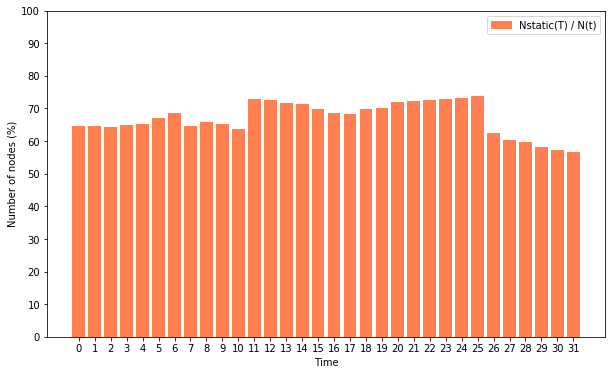

In [11]:
import matplotlib.patches as mpatches

graph_nodes_1 = set(graph_list[0].nodes)
nodes_variation = list()
nodes_stable = set(graph_list[0].nodes)
nodes_changes = dict()

for i in range(1, len(graph_list)):
    graph_nodes_2 = set(graph_list[i].nodes)
    # Nodes in S2 but not in S1
    join = graph_nodes_2 - graph_nodes_1
    # Nodes in S1 but not in S2
    leave = graph_nodes_1 - graph_nodes_2
    variation = (len(join), len(leave))
    nodes_variation.append(variation)
    nodes_changes[i] = (join, leave)
    nodes_stable = nodes_stable & graph_nodes_2
    graph_nodes_1 = graph_nodes_2

print('Nodes variation: ' + str(nodes_variation))
print('Stable nodes: ' + str(len(nodes_stable)))

ingresso = [item[0] for item in nodes_variation]
uscita = [item[1] for item in nodes_variation]

churn_rate_in = list()
churn_rate_out = list()
for i in range(1, len(graph_list)):
    churn_rate_in.append(ingresso[i-1] /graph_list[i].order())
    churn_rate_out.append(uscita[i-1] / graph_list[i-1].order())
print(np.mean(churn_rate_in) * 100)
print(np.mean(churn_rate_out) * 100)
print('std ' + str(np.std(churn_rate_in)))
print('std ' + str(np.std(churn_rate_out)))

plt.rcParams['figure.figsize'] = (10, 6)
plt.xlabel('Time')
plt.ylabel('Number of nodes (%)')
bar_patch = mpatches.Patch(color='coral', label='Nstatic(T) / N(t)')
plt.xticks(np.arange(0, len(graph_list)))
plt.yticks(np.arange(0, 101, step=10))
plt.ylim(0,100)
for i, graph in enumerate(graph_list):
    plt.bar(i, len(nodes_stable)/ graph.order()*100, color='coral')
plt.legend(handles=[bar_patch])
plt.savefig('percentage_static_nodes.png', bbox_inches='tight')
plt.show()

In [4]:
degree_join = dict()
avg_degree_leave_list = list()
avg_degree_join_list = list()
avg_degree_join = 0
avg_degree_leave = 0
for i, item in enumerate(nodes_changes.values()):
    avg_degree_join = 0
    avg_degree_leave = 0
    if len(item[0]) == 0:
        avg_degree_join_list.append(0)
    else:
        for elem in item[0]:
            degree_join = graph_list[i+1].degree(elem)
            avg_degree_join += degree_join
        avg_degree_join_list.append(avg_degree_join / len(item[0]))

    if len(item[1]) == 0:
        avg_degree_leave_list.append(0)
    else:
        for elem in item[1]:
            degree_leave = graph_list[i].degree(elem)
            avg_degree_leave += degree_leave
        avg_degree_leave_list.append(avg_degree_leave / len(item[1]))

print('Avg. degree join (channel nodes)(snapshot): ' + str(avg_degree_join_list))
print(np.mean(avg_degree_join_list))

print('Avg. degree leave (channel nodes)(snapshot): ' + str(avg_degree_leave_list))
print(np.mean(avg_degree_leave_list))


Avg. degree join (channel nodes)(snapshot): [1.875, 1.8, 2.0, 0, 0, 0, 2.156862745098039, 2.0, 1.5454545454545454, 1.1153846153846154, 5.875, 1.7333333333333334, 1.6153846153846154, 2.0, 1.3529411764705883, 1.6153846153846154, 1.25, 0, 0, 0, 0, 0, 0, 0, 0, 3.431137724550898, 1.59375, 2.4375, 1.5416666666666667, 2.466666666666667, 2.4285714285714284]
1.3494851010634197
Avg. degree leave (channel nodes)(snapshot): [1.0, 1.0, 2.5, 1.2, 1.0, 1.0, 1.0, 1.1578947368421053, 1.2, 1.5, 1.0185185185185186, 1.4615384615384615, 1.3333333333333333, 1.4285714285714286, 1.0, 1.0, 10.0, 2.066666666666667, 1.0, 2.0, 4.666666666666667, 1.0, 1.0, 1.0, 1.0, 1.1333333333333333, 1.0, 1.0, 1.0, 2.3333333333333335, 1.2]
1.6516082735098017


Edges variation: [(23, 7), (13, 10), (16, 37), (2, 3), (0, 71), (0, 81), (108, 54), (20, 37), (6, 31), (24, 22), (27, 120), (36, 35), (12, 9), (5, 10), (20, 3), (7, 18), (0, 9), (0, 91), (0, 30), (0, 33), (0, 20), (0, 9), (0, 28), (0, 8), (0, 8), (174, 93), (51, 19), (19, 9), (13, 19), (3, 6), (4, 6)]
Stable channels: 1202
31
11.680960548885077


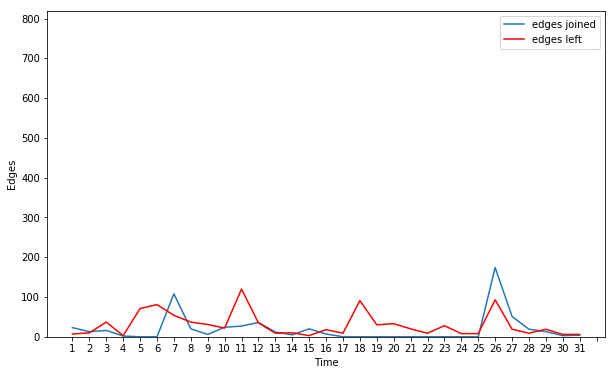

In [19]:
stable_graph_1 = graph_list[0].subgraph(nodes_stable)
graph_edges_1 = set(stable_graph_1.edges)
edges_variation = list()
edges_stable = set(stable_graph_1.edges)
edges_changes_stable = list()

for i in range(1, len(graph_list)):
    stable_graph_2 = graph_list[i].subgraph(nodes_stable)
    graph_edges_2 = set(stable_graph_2.edges)
    # Nodes in S2 but not in S1
    join = graph_edges_2 - graph_edges_1
    # Nodes in S1 but not in S2
    leave = graph_edges_1 - graph_edges_2
    variation = (len(join), len(leave))
    edges_variation.append(variation)
    edges_changes_stable.append((join, leave))
    edges_stable = edges_stable & graph_edges_2
    graph_edges_1 = graph_edges_2

print('Edges variation: ' + str(edges_variation))
print('Stable channels: ' + str(len(edges_stable)))
print(len(edges_changes_stable))
join_ttl = list()
for i, tup in enumerate(edges_changes_stable):
    for elem in tup[0]:
        count_ttl = 0
        for j in range(i+1, len(edges_changes_stable)):
            if graph_list[j].has_edge(elem[0], elem[1]):
                count_ttl += 1
            else:
                break
        join_ttl.append(count_ttl)
print(np.mean(join_ttl))

edges_joined = [elem[0] for elem in edges_variation]
edges_left = [elem[1] for elem in edges_variation]

plt.xlabel('Time')
plt.ylabel('Edges')
plt.ylim(0,820)
plt.xticks(np.arange(0, len(graph_list)), np.arange(1, len(graph_list)))
plt.plot(edges_joined, label='edges joined')
plt.plot(edges_left, c='r', label='edges left')
plt.legend()
plt.savefig('edge_stable_churn_plot.png', bbox_inches='tight')
plt.show()

Edges variation: [(40, 19), (25, 13), (28, 66), (3, 9), (0, 104), (3, 113), (227, 76), (36, 67), (33, 44), (77, 38), (91, 243), (75, 61), (36, 20), (38, 24), (55, 8), (35, 30), (10, 21), (0, 148), (0, 40), (0, 70), (0, 35), (5, 19), (0, 34), (0, 10), (0, 15), (787, 172), (173, 24), (119, 24), (90, 48), (66, 19), (52, 24)]
Stable channels: 1198
31
8.77661596958175


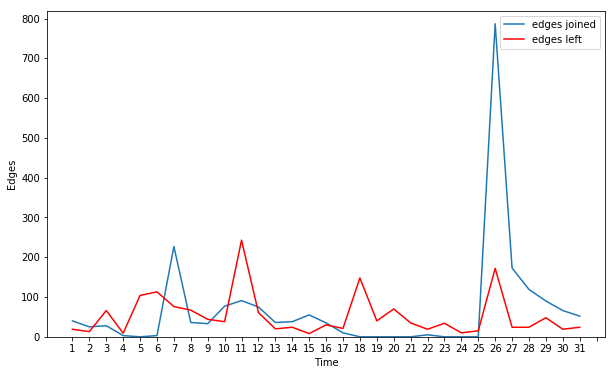

In [21]:
stable_graph_1 = graph_list[0]
graph_edges_1 = set(stable_graph_1.edges)
edges_variation = list()
edges_stable = set(stable_graph_1.edges)
edges_changes_stable = list()

for i in range(1, len(graph_list)):
    stable_graph_2 = graph_list[i]
    graph_edges_2 = set(stable_graph_2.edges)
    # Nodes in S2 but not in S1
    join = graph_edges_2 - graph_edges_1
    # Nodes in S1 but not in S2
    leave = graph_edges_1 - graph_edges_2
    variation = (len(join), len(leave))
    edges_variation.append(variation)
    edges_changes_stable.append((join, leave))
    edges_stable = edges_stable & graph_edges_2
    graph_edges_1 = graph_edges_2

print('Edges variation: ' + str(edges_variation))
print('Stable channels: ' + str(len(edges_stable)))
print(len(edges_changes_stable))
join_ttl = list()
for i, tup in enumerate(edges_changes_stable):
    for elem in tup[0]:
        count_ttl = 0
        for j in range(i+1, len(edges_changes_stable)):
            if graph_list[j].has_edge(elem[0], elem[1]):
                count_ttl += 1
            else:
                break
        join_ttl.append(count_ttl)
print(np.mean(join_ttl))

edges_joined = [elem[0] for elem in edges_variation]
edges_left = [elem[1] for elem in edges_variation]

plt.xlabel('Time')
plt.ylabel('Edges')
plt.ylim(0,820)
plt.xticks(np.arange(0, len(graph_list)), np.arange(1, len(graph_list)))
plt.plot(edges_joined, label='edges joined')
plt.plot(edges_left, c='r', label='edges left')
plt.legend()
plt.savefig('edge_churn_plot.png', bbox_inches='tight')
plt.show()

52.551193251026945


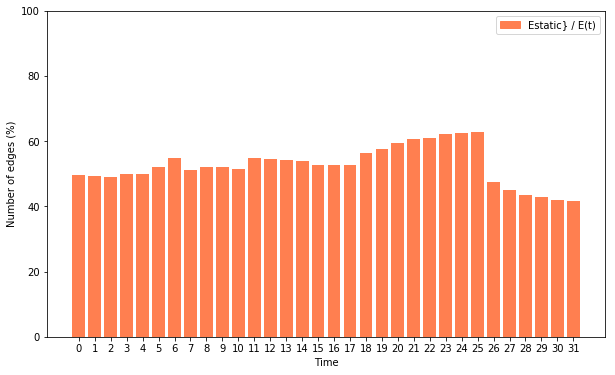

In [12]:
import matplotlib.patches as mpatches

print(np.mean([(len(edges_stable)/len(graph.edges)) * 100 for graph in graph_list]))
for i, graph in enumerate(graph_list):
    plt.bar(i, (len(edges_stable)/len(graph.edges)) * 100, color='coral')
coral_patch = mpatches.Patch(color='coral', label='Estatic} / E(t)')
plt.legend(handles=[coral_patch])
plt.ylim(0,100)
plt.xticks(np.arange(len(graph_list)))
plt.xlabel('Time')
plt.ylabel('Number of edges (%)')
plt.savefig('edge_stable_ratio.png', bbox_inches='tight')
plt.show()

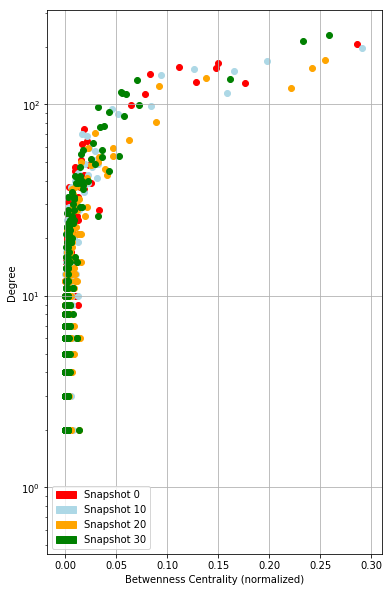

In [ ]:
import matplotlib.patches as mpatches

"""
Normal and semilog plotting of correlation between 
degree distribution and betweenness centrality score.
"""

os.chdir("D:\Documenti\Lightning_Network_Logs_wider")
betweenness_centrality_values = sorted(betweenness_centrality_list[0].items(), reverse=True, key=lambda x: x[1])
betweenness_centrality_values = [item for item in betweenness_centrality_values if item[1] != 0]
degree_centrality_values = [(graph_list[0].degree(item[0]), item[1]) for item in betweenness_centrality_values]
for item in degree_centrality_values:
    plt.scatter(item[1], item[0], c='r')

betweenness_centrality_values = sorted(betweenness_centrality_list[10].items(), reverse=True, key=lambda x: x[1])
betweenness_centrality_values = [item for item in betweenness_centrality_values if item[1] != 0]
degree_centrality_values = [(graph_list[10].degree(item[0]), item[1]) for item in betweenness_centrality_values]
for item in degree_centrality_values:
    plt.scatter(item[1], item[0], c='lightblue')    

betweenness_centrality_values = sorted(betweenness_centrality_list[20].items(), reverse=True, key=lambda x: x[1])
betweenness_centrality_values = [item for item in betweenness_centrality_values if item[1] != 0]
degree_centrality_values = [(graph_list[20].degree(item[0]), item[1]) for item in betweenness_centrality_values]
for item in degree_centrality_values:
    plt.scatter(item[1], item[0], c='orange')  
    
betweenness_centrality_values = sorted(betweenness_centrality_list[30].items(), reverse=True, key=lambda x: x[1])
betweenness_centrality_values = [item for item in betweenness_centrality_values if item[1] != 0]
degree_centrality_values = [(graph_list[30].degree(item[0]), item[1]) for item in betweenness_centrality_values]
for item in degree_centrality_values:
    plt.scatter(item[1], item[0], c='green')

plt.grid(True)
plt.semilogy()
plt.ylabel('Degree')
plt.xlabel('Betwenness Centrality (normalized)')
red_patch = mpatches.Patch(color='red', label='Snapshot 0')
lightblue_patch = mpatches.Patch(color='lightblue', label='Snapshot 10')
orange_patch = mpatches.Patch(color='orange', label='Snapshot 20')
green_patch = mpatches.Patch(color='green', label='Snapshot 30')
plt.legend(handles=[red_patch,lightblue_patch,orange_patch,green_patch])
plt.rcParams['figure.figsize'] = (6, 10)
plt.savefig('scatter_plot_betweenness_centrality_semilog.png', bbox_inches='tight')
plt.show()


In [64]:
iteration_list = list()
for k in range(len(graph_list)):
    removed_nodes = 0
    iteration = 0
    current_graph = graph_list[k].copy()
    while removed_nodes < (graph_list[k].order()):
        iteration += 1
        current_graph_betweenness = nx.betweenness_centrality(current_graph)
        # List of tuples (node, score) ordered by score
        current_graph_betweenness_sorted = sorted(current_graph_betweenness.items(), reverse=True, key=lambda x: x[1])
        # Remove the first element of the ordered list from the graph
        current_graph.remove_node(current_graph_betweenness_sorted[0][0])
        # Increment removed_nodes with the newly deleted node
        removed_nodes += 1
        current_graph_subgraph_list = sorted(nx.connected_component_subgraphs(current_graph), reverse=True, key=len)
        # Grab the largest subgraph from the subgraph list
        if not current_graph_subgraph_list:
            break
        current_graph = current_graph_subgraph_list[0]
        current_removed_nodes = 0
        for i in range(1, len(current_graph_subgraph_list)):
            current_removed_nodes += current_graph_subgraph_list[i].order()
        output_string = ''
        removed_nodes += current_removed_nodes
        # if len(current_graph_subgraph_list) != 1:
        #     output_string = '[' + str(iteration).zfill(2) + '] -- nodes disconnected: ' + str(current_removed_nodes) + \
        #         ', total nodes removed: ' + str(removed_nodes) + ', second max component size: ' + \
        #         str(len(current_graph_subgraph_list[1]))
        # else:
        #     output_string = '[' + str(iteration).zfill(2) + '] -- nodes disconnected: ' + str(current_removed_nodes) + \
        #         ', total nodes removed: ' + str(removed_nodes) + ', second max component size: 0'
        # print(output_string)
    iteration_list.append(iteration)
    print(iteration)
    print(removed_nodes)
print(iteration_list)

57
779


59
779


59
781


58
775


57
770


55
749


56
734


58
778


58
765


58
771


54
791


60
691


59
693


60
703


60
706


60
720


60
732


59
735


59
720


56
717


56
700


55
697


55
694


56
689


56
687


53
682


66
804


64
834


64
844


69
865


69
877


72
886
[57, 59, 59, 58, 57, 55, 56, 58, 58, 58, 54, 60, 59, 60, 60, 60, 60, 59, 59, 56, 56, 55, 55, 56, 56, 53, 66, 64, 64, 69, 69, 72]


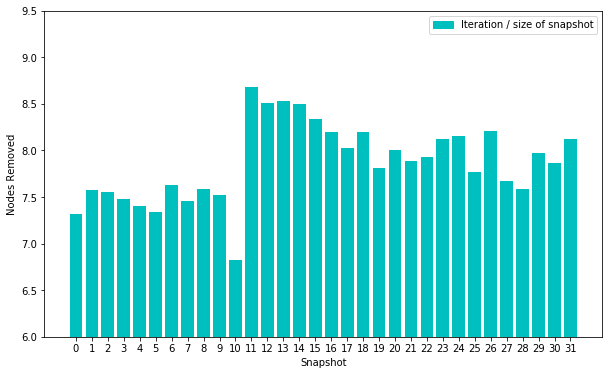

In [89]:
import matplotlib.patches as mpatches

plt.rcParams['figure.figsize'] = (10, 6)
plt.xticks(np.arange(len(graph_list)))
for i, item in enumerate(iteration_list):
    plt.bar(i, (item / (len(graph_list[i])) * 100), color='c')
plt.xlabel('Snapshot')
plt.ylim(6, 9.5)
bar_patch = mpatches.Patch(color='c', label='Iteration / size of snapshot')
plt.legend(handles=[bar_patch])
plt.ylabel('Nodes Removed')
plt.savefig('monthly_betweenness_centrality_attack_percentage', bbox_inches='tight')
plt.show()


In [79]:
avg_nodes_to_disconnect = np.mean([(item / (len(graph_list[i])) * 100) for i, item in enumerate(iteration_list)])
print(avg_nodes_to_disconnect)

7.868310932436511
